# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer:** I expect the following relationships:<br>
1) <b> (RM ++, MEDV ++) </b> <br>
"More rooms" should be better than "less rooms" as it implies more space, so we can expect that a house with 10 rooms has a higher price than a house with only one room. <br>
2) <b >(LSTAT ++, MEDV --) </b> <br>
The percentage of working poors could be seen as having negative impact on house prices in the neighborhood, as the neighborhood could be perceived as less exlcusive. <br>
3) <b> (PTRATIO ++, MEDV --)  </b> <br>
This ratio could be seen as having a negative effect on a house price. For example, having a ratio of 50 students to 1 teacher could be seen as worse than having a ratio of 10 students to 1 teacher, since the latter could represent a better education context for children.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)  
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** Given a R^2 coefficient of 0.923, I would say the model successfully captures the variation of target variable, since this value is much closer to 1 than 0, indicating the goodness of fit of our model to the true data.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** The problem with not testing of a model after training is that the model could be exposed to sensitivity to new data, i.e. to perform poorly when used to predict data the model has never seen before. This is called **overfitting**.
So it is good practice to test a model after training to assess how the model could perform in real-life situations.
Ideally we would like to maximize the size of both the training and testing sets, but we have the constraint that train_size + test_size = tot_sample_size. 
A smart way to handle with this constraint is the K-Folds cross-validator, which splits the data into *k* consecutive folds and each fold is used once as a testing set while all other *(k-1)* folds are used for training. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

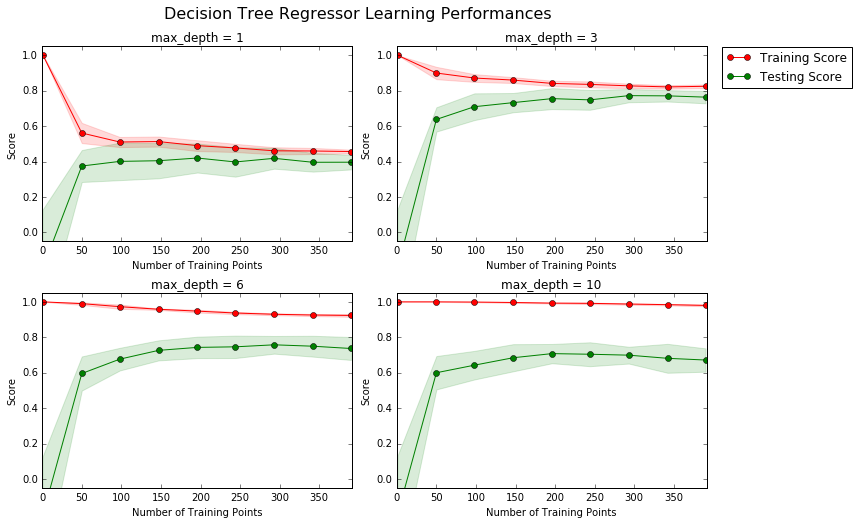

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** I choose the graph with *max_depth = 3*.
The score of the training curve drops from 1.0 to approximately 0.8 as more training points are added.
The score of the testing curve instead raises from 0 to approximately 0.8, adding more training points.
So, having more points would benefit the model for max_depth =3. However, we can see from the plots that, when the number of training points gets between 50 and 150 (depending on max_depth), the model reaches plateau and the testing score curve becomes flat when more training points are added.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

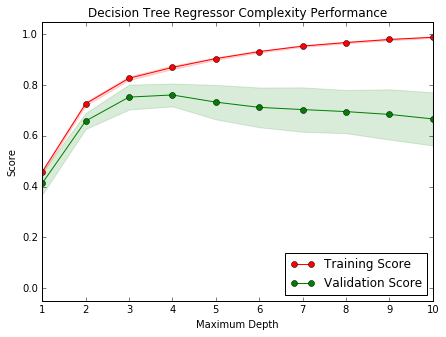

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** When the model is trained with a max_depth of 1, it suffers from high bias.
In fact, the model tends to underfit, yielding an average training and testing score of around 40%. We can see this in the left part of the graph where the red and the green curve are almost overlapping across a low 40% score.
When the model is trained with a max_depth of 10 instead, it suffers from high variance.
We can see that the model overfits because it shows a high performance on the training set (close to 1, the red line) but a much lower performance on the testing set (~60%, the green line).

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** I would say the optimal maximum depth is 3. At this level, we can see from the Complexity performance graph that both the training and testing scores are around ~80% (i.e. we can expect low bias) and we do not have much difference training and testing scores (i.e. we can expect low variance)

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search techique allows you to pick the best set of parameters for a given algorithm.
You can pass a set of parameters and corresponding value ranges to the GridSearchCV function in Sci-Kit learn and, upon fitting, you can extract the best estimatorl, i.e. the best parameters that allow to achieve the highest fitting according to a specified train/test splitting strategy and a scoring function to assess the goodness of fit. <br><br>
**How Grid Search works in practice** <br>
Let's say you want to tune the parameters for a Decision Tree algorithm for a regression task (similar to this Boston Housing prices predition). You have chosen the R^2 as a metric to assess performance and you do not know whether to choose the Gini criterion or the Entropy criterion, or which maximum depth (from 1 to 5) would maximize the R^2.
<br> In sklearn, by calling: 
<br> grid_search.GridSearchCV(DecisionTreeClassifier(), {'criterion':('gini','entropy'), 'max_depth':range(1,6)}) <br>
the program will calculate the R^2 for the following 10 combinations: <br> <br>
1) (criterion='gini', 'max_depth':1) <br>
2) (criterion='gini', 'max_depth':2) <br>
3) (criterion='gini', 'max_depth':3) <br>
4) (criterion='gini', 'max_depth':4) <br>
5) (criterion='gini', 'max_depth':5) <br>
6) (criterion='entropy', 'max_depth':1) <br>
7) (criterion='entropy', 'max_depth':2) <br>
8) (criterion='entropy', 'max_depth':3) <br>
9) (criterion='entropy', 'max_depth':4) <br>
10) (criterion='entropy', 'max_depth':5) <br> <br>

and will return (as best_params) the combination that yields the highest R^2.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** As I wrote aboove in the answer for question 3, the k-fold cross validation training is a tecnqique that allows you to split the data into k separate folds and then picking up each one of them as a testing set and the remaining (k-1) sets for training. At the end, the average of the training and testing score is returned.
This method is very helpful in conjunction with the grid search method. In fact, if we used only one split to produce the score of a given model, this score might be noisy (because for example the draw from an 80/20 train/test split was 'unlucky' and the training set ended up being formed only by data sharing the same value for, say, feature 'A').
<br> <br>
*How k-fold cross validation works in conjunction with GridSearchCV* <br>
To continue with the example from question 7, if we select a k=20 for cross validation, there will be 20 folds (each fold is a subset containing 5% of the prices and features data) and 20 iterations. 
At each iteration a different fold is used for testing and the other 19 are used for training. If we use this k-fold cv with GridSearchh from the example in the answer to question 7, then we will have the two following steps:
<br> <br>
1) for each of the 10 combinations of ('criterion', 'max_depth'), the GridSearch will calculate the **average R^2s** over 20 iterations (i.e. at each iteration a different fold is taken for testing and the other 19 for training). <br>
2) Finally, GridSearch will return the combination of ('criterion', 'max_depth') with the highest R^2.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** Contrary to my anwser in question 6, the optimal maximum depth is 4 (not 3).
This makes sense in retrospective, because (looking at the graph from line [13]) max_depth = 4 has roughly the same testing score as the training score (~80%) but the training score is slightly higher.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: ** The predicted selling prices are the following: <br>
Predicted selling price for Client 1's home: 403,025.00 USD <br>
Predicted selling price for Client 2's home: 237,478.72 USD <br>
Predicted selling price for Client 3's home: 931,636.36 USD <br>

If I look at the 3 graphs generated below (thanks to my reviewer!) I can compare where each house stands compared to others if we consider each feature separately (I leave House 2 at the end as it is the one that requires more analysis in my opinion).
<br>**House 3** <br>
House 3 (the most expensive one) looks well priced. In fact, it looks quite aligned to its peers in each of the three graphs.
<br>**House 1** <br>
House 1 looks fairly priced as well, as in all the three graphs below it does not appear to be an outlier compared to its peers.
<br> **House 2** <br>
House 2 looks a bit overpriced from graph 2, where the graph suggests a parabolic relationship between MEDV and RM. House 2 instead falls slightly higher than this hypothetic parabolic line. However, this overprice looks compensated by the third graph where House 2 looks underpriced compared to other houses sharing a similar PTRATIO.
So overall I would say that it is not clear whether House 2 is fairly priced by the model, but some additional analysis would be required (please see below).
<br><br>

To better assess the pricing of House 2, an alternative could be to run a KNN regression and compare the House price to its 10 closest (in MEDV terms) houses (thanks to my 2nd reviewer for this suggestion).
If we run this analysis (please see "In [15] below") we can see that, while House 1 and House 3 are quite close to our predicted selling price (with differences of 3,605 USD and 61,186.36 USD, i.e. 0.9% and 7.03% respectively).
House 2 instead shows a difference of 40,708.72 USD. While this could seem smaller than the difference in House 3, in percentage this makes a difference of 20.69% (almost three times more than House 3). <br>
Therefore I would draw the conclusion that House 2 is a bit overpriced by our DecisionTree regression model.

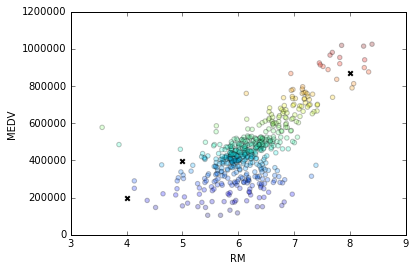

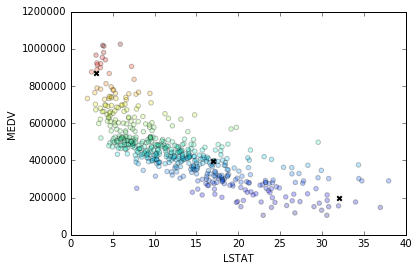

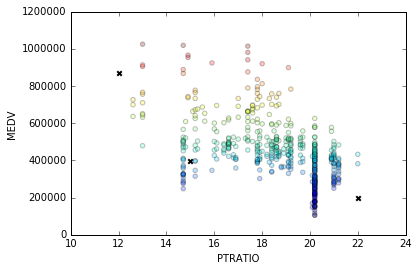

In [16]:
from matplotlib import pyplot as plt

clients = np.transpose(client_data)
pred = reg.predict(client_data)
for i, feat in enumerate(['RM','LSTAT','PTRATIO']):
    plt.scatter(features[feat], prices, alpha=0.25, c=prices)
    plt.scatter(clients[i], pred, color='black', marker='x', linewidths=2)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()

In [15]:
from sklearn.neighbors import KNeighborsRegressor as knn
reg = knn(n_neighbors=10)
reg.fit(features, prices)
knn_pred = reg.predict(client_data)
print 'knn prediction:'
print knn_pred

knn prediction:
[ 399420.  196770.  870450.]


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [12]:
print 'Client 1'
vs.PredictTrials(features, prices, fit_model, client_data)

Client 1
Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


In [13]:
print 'Client 2'
vs.PredictTrials_2(features, prices, fit_model, client_data)

Client 2
Trial 1: $189,123.53
Trial 2: $284,200.00
Trial 3: $236,478.26
Trial 4: $235,122.22
Trial 5: $218,540.00
Trial 6: $235,620.00
Trial 7: $238,132.08
Trial 8: $229,200.00
Trial 9: $243,857.89
Trial 10: $228,385.71

Range in prices: $95,076.47


In [14]:
print 'Client 3'
vs.PredictTrials_3(features, prices, fit_model, client_data)

Client 3
Trial 1: $942,666.67
Trial 2: $933,975.00
Trial 3: $888,720.00
Trial 4: $896,280.00
Trial 5: $854,700.00
Trial 6: $922,740.00
Trial 7: $896,962.50
Trial 8: $979,300.00
Trial 9: $904,718.18
Trial 10: $941,220.00

Range in prices: $124,600.00


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** I believe that this model could be used in a real-world setting just to get a quick and approximate idea just about a potential range at which the client could sell her/his house at. <br>
I see a few limitations in the simple model developed in the project: <br> <br>

1) ** Data series:** data collected from 1978 (although adjusted by the inflation) do not consider that perhaps the inclination for people to spend more for a given house has risen. Or alternatively, it does not consider that people that would have spent X to buy a Y-square-meters house in the 80's now would spend X/2 because the dimension Y of the house is less perceived as a social status. <br> In one sentence, the data do not represent market trends. This could be taken into account by, for example, assigning more weights in the regression to the more recent sold houses and less to the older ones. <br> <br>

2) **Features displayed: ** the features in the data might be sufficient at first glance, but they do not represent all aspects of a house. <br> This is not an issue *per se*, given that a model would always need to make simplified assumptions about the real-world, thus reducing the number of features for a house price in this case, but the point is that we cannot be sure that there aren't other features that better manage to determine the price of a house in Boston. <br> Other features could be: a) proximity to the airport/tube station/train station; b) the floor number if the house belongs to a development; c) if the house was newly built or restructured over the last (say) 5 years. <br> If we had this additional features we could use the Pipeline function in Sklearn to make a Principal Component Analysis before running the GridSearch. This way we would optimize the model parameters on those features we know that explain the most variability among the data and are better to extract to represent the data more synthetically.

3) **Urban vs rural cities ** Data collected in an urban city like Boston would not be good to predict prices for rural cities. The latter in fact would show different preferences in terms of house choice and I would also expect (on average) lower prices, given that (in Western countries) big cities tend to have a higher GDP/per capita (suggesting a [`correlation between urbanization and GDP/per capital`](https://theaspiringeconomist.wordpress.com/2016/04/11/urbanization-vs-gdp-per-capita-revisited/)).
<br> <br>

** In conclusion**, I would say that the model would need some additional fine-tuning in order to be robust enough to make consistent predictions. In particular I would say that the model is not robust enough particularly for client 2, where the range in prices is 95k, which is 41% of the average prediction for this client (I have extended visual.py to run the Predict_Trial function also on the other two clients).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.